In [74]:
# para manejar conjuntos de datos
import pandas as pd
import numpy as np

# para ploteo
import matplotlib.pyplot as plt
import seaborn as sns

# para la yeo-johnson transformation
import scipy.stats as stats

# para mostrar todas las columnas del dataframe en el cuaderno
pd.pandas.set_option('display.max_columns', None)

In [75]:
# cargar dataset
data = pd.read_csv('./Input/train.csv')

# filas y columnas del dataset
print(data.shape)

# visualise the dataset
data.head()

(1642, 10)


,model,year,motor_type,running,wheel,color,type,status,motor_volume,price
0,toyota,2022,petrol,3000 km,left,skyblue,sedan,excellent,2.0,24500
1,mercedes-benz,2014,petrol,132000 km,left,black,sedan,excellent,2.0,25500
2,kia,2018,petrol,95000 miles,left,other,sedan,excellent,2.0,11700
3,mercedes-benz,2002,petrol,137000 miles,left,golden,sedan,excellent,3.2,12000
4,mercedes-benz,2017,petrol,130000 km,left,black,sedan,good,2.0,26000


In [76]:
print(data.isnull().sum())


model           0
year            0
motor_type      0
running         0
wheel           0
color           0
type            0
status          0
motor_volume    0
price           0
dtype: int64


In [77]:
print(data.nunique())


model             5
year             32
motor_type        5
running         643
wheel             1
color            17
type              7
status            5
motor_volume     20
price           294
dtype: int64


In [78]:
print(data['model'].value_counts())


model
mercedes-benz    402
hyundai          351
nissan           350
kia              285
toyota           254
Name: count, dtype: int64


In [79]:
# Identificar columnas categóricas y numéricas
categorical_columns = data.select_dtypes(include=['object']).columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Verificar valores nulos en categóricas
print("Valores nulos en variables categóricas:")
print(data[categorical_columns].isnull().sum())

# Verificar valores nulos en numéricas
print("\nValores nulos en variables numéricas:")
print(data[numerical_columns].isnull().sum())


Valores nulos en variables categóricas:
model         0
motor_type    0
running       0
wheel         0
color         0
type          0
status        0
dtype: int64

Valores nulos en variables numéricas:
year            0
motor_volume    0
price           0
dtype: int64


In [80]:
data = data.drop(columns=['wheel'])


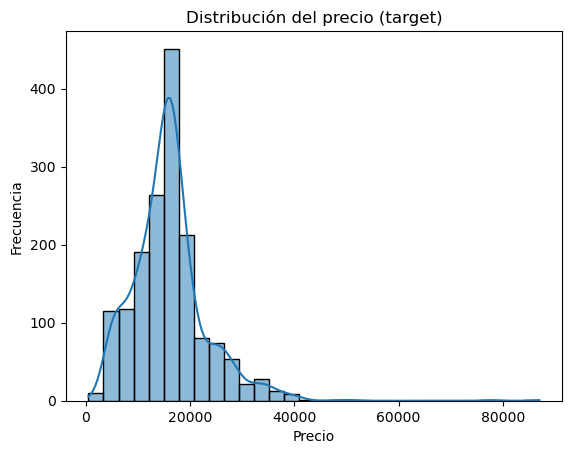

In [38]:
# Distribución del target
sns.histplot(data['price'], kde=True, bins=30)
plt.title('Distribución del precio (target)')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()


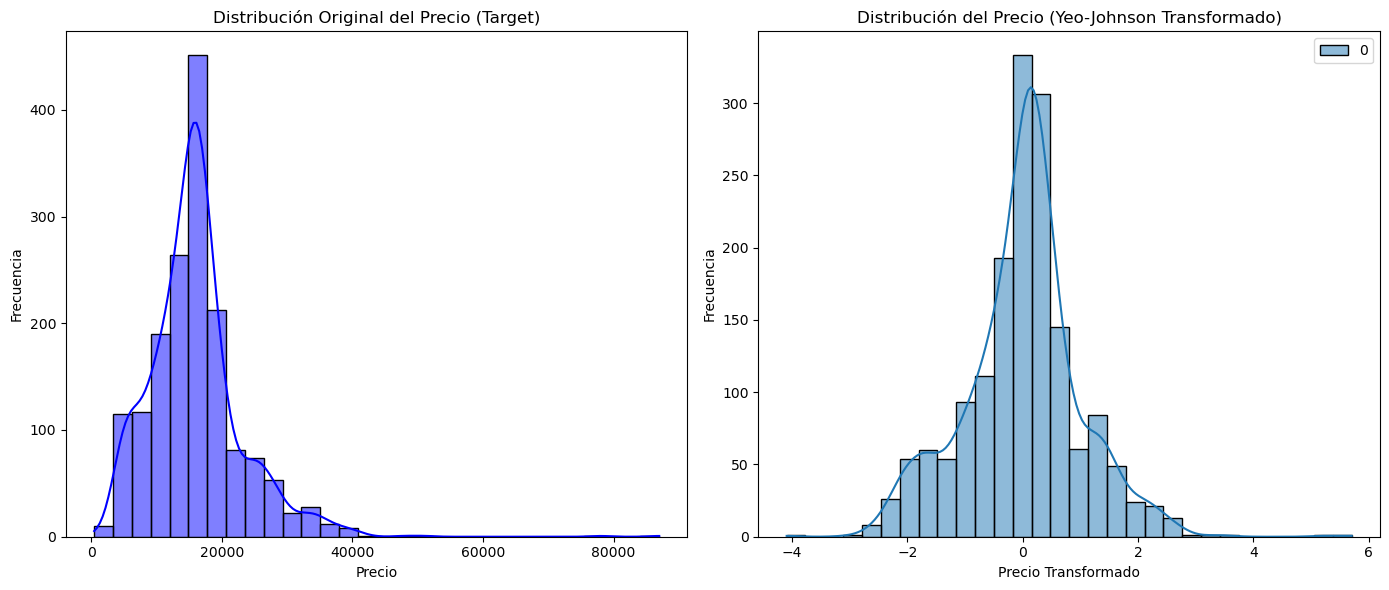

In [52]:
from sklearn.preprocessing import PowerTransformer

# Aplicar Yeo-Johnson al target (price)
pt = PowerTransformer(method='yeo-johnson')  # Instancia del transformador
price_transformed = pt.fit_transform(data[['price']])  # Transformar los precios

# Comparar la distribución original vs transformada
plt.figure(figsize=(14, 6))

# Distribución original
plt.subplot(1, 2, 1)
sns.histplot(data['price'], kde=True, bins=30, color='blue')
plt.title('Distribución Original del Precio (Target)')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')

# Distribución transformada
plt.subplot(1, 2, 2)
sns.histplot(price_transformed, kde=True, bins=30, color='green')
plt.title('Distribución del Precio (Yeo-Johnson Transformado)')
plt.xlabel('Precio Transformado')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


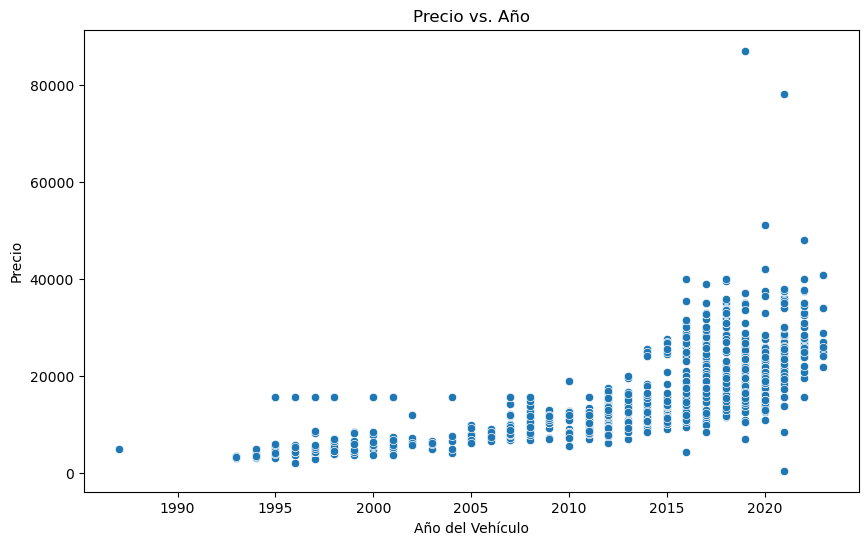

In [53]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['year'], y=data['price'])
plt.title('Precio vs. Año')
plt.xlabel('Año del Vehículo')
plt.ylabel('Precio')
plt.show()


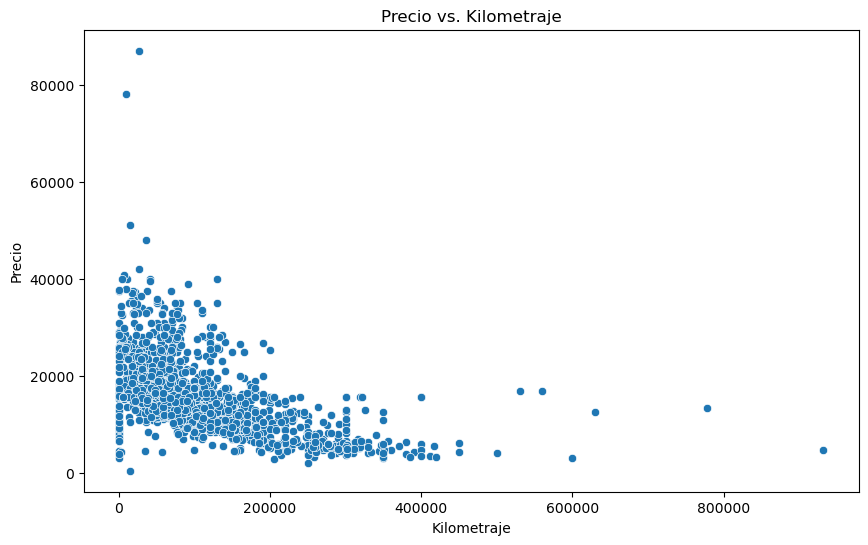

In [54]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['running'], y=data['price'])
plt.title('Precio vs. Kilometraje')
plt.xlabel('Kilometraje')
plt.ylabel('Precio')
plt.show()


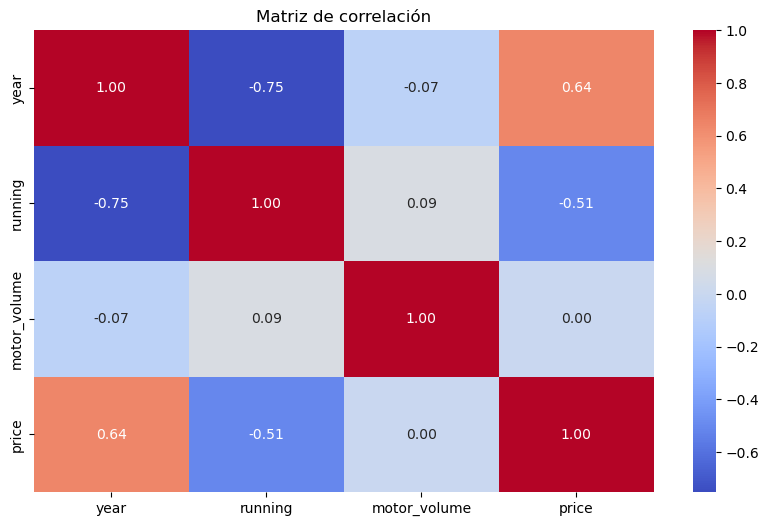

In [55]:
# Filtrar solo las columnas numéricas para la matriz de correlación
numeric_data = data.select_dtypes(include=[np.number])

# Calcular la matriz de correlación
correlation_matrix = numeric_data.corr()

# Visualizar la matriz con un heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt='.2f')
plt.title('Matriz de correlación')
plt.show()


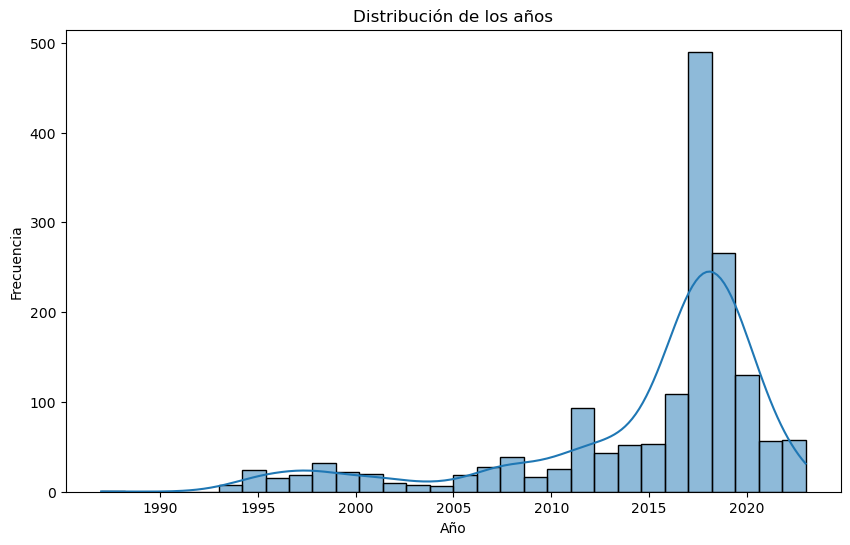

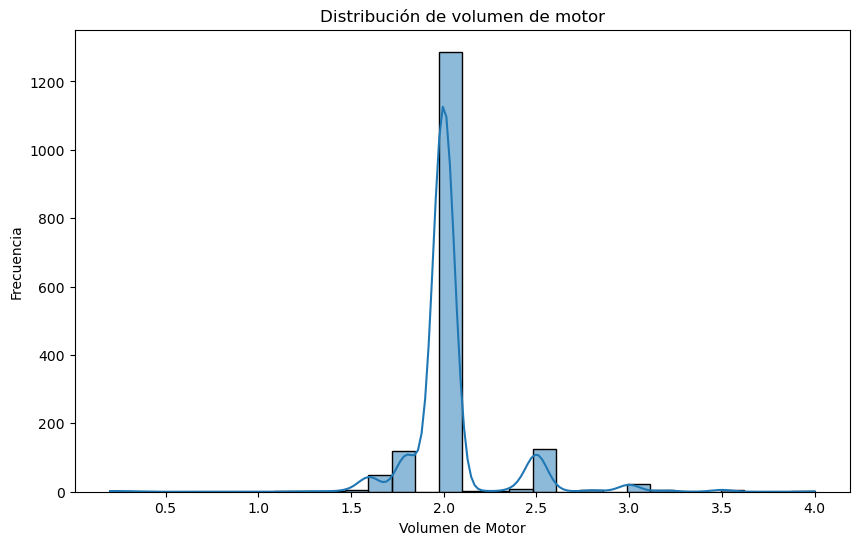

In [57]:
# Histograma de año
plt.figure(figsize=(10, 6))
sns.histplot(data['year'], kde=True, bins=30)
plt.title('Distribución de los años')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.show()

# Histograma de volumen de motor
plt.figure(figsize=(10, 6))
sns.histplot(data['motor_volume'], kde=True, bins=30)
plt.title('Distribución de volumen de motor')
plt.xlabel('Volumen de Motor')
plt.ylabel('Frecuencia')
plt.show()


In [ ]:
##analisis de variables categorica

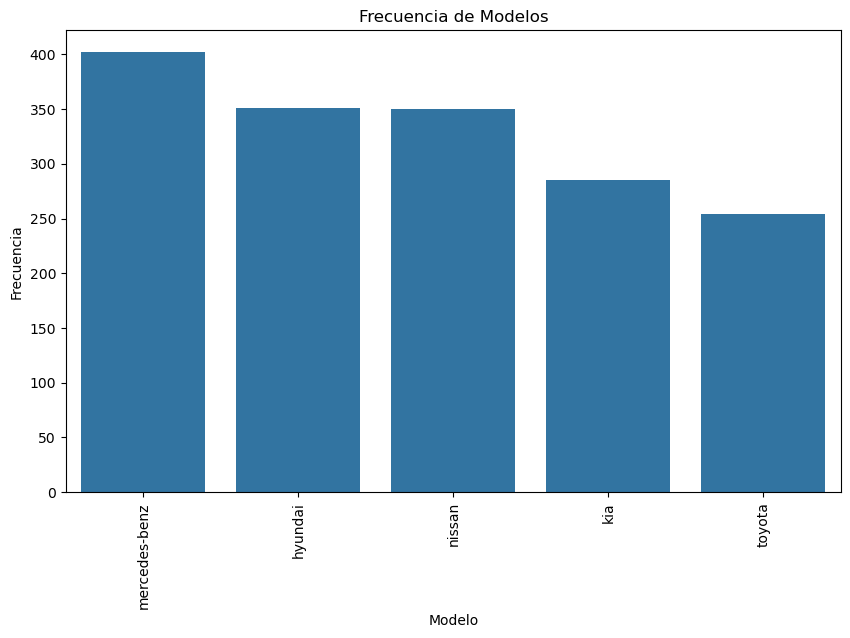

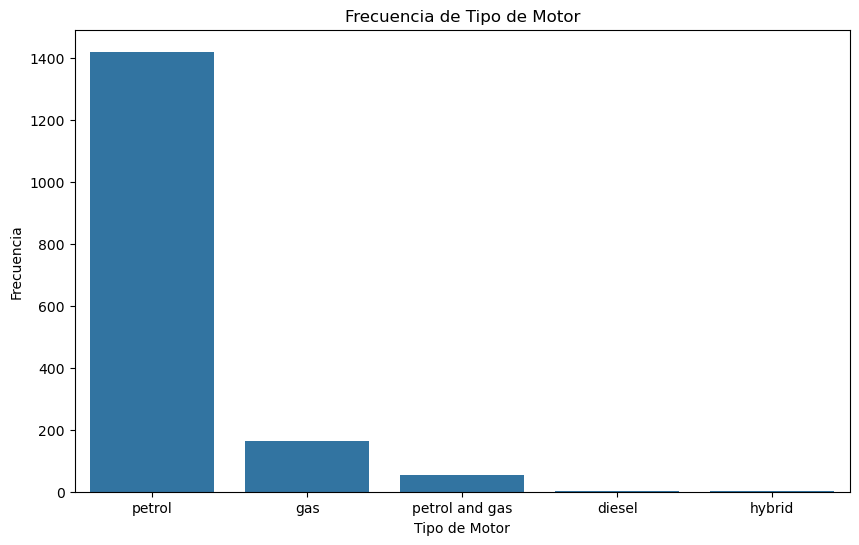

In [59]:
# Gráfico de barras de 'model'
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='model', order=data['model'].value_counts().index)
plt.title('Frecuencia de Modelos')
plt.xlabel('Modelo')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.show()

# Gráfico de barras de 'motor_type'
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='motor_type', order=data['motor_type'].value_counts().index)
plt.title('Frecuencia de Tipo de Motor')
plt.xlabel('Tipo de Motor')
plt.ylabel('Frecuencia')
plt.show()


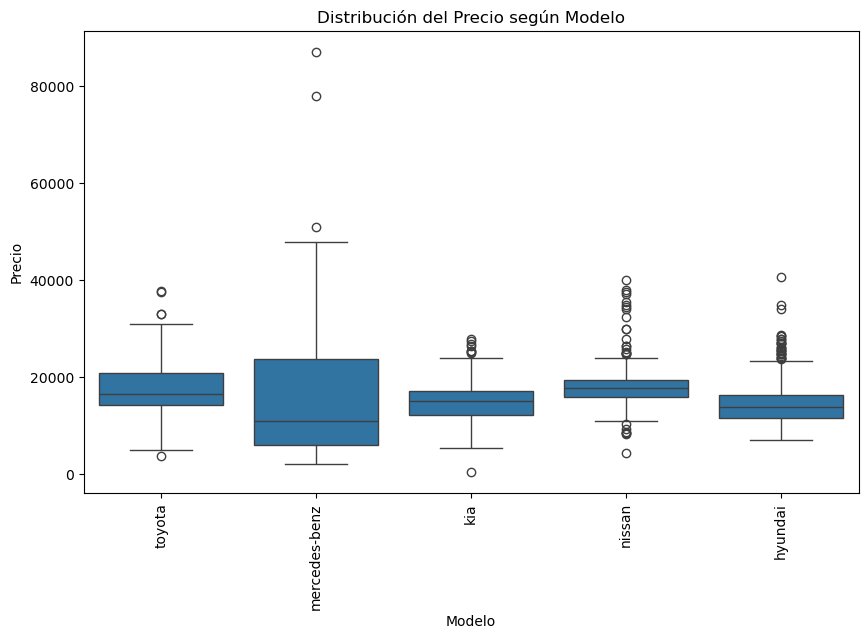

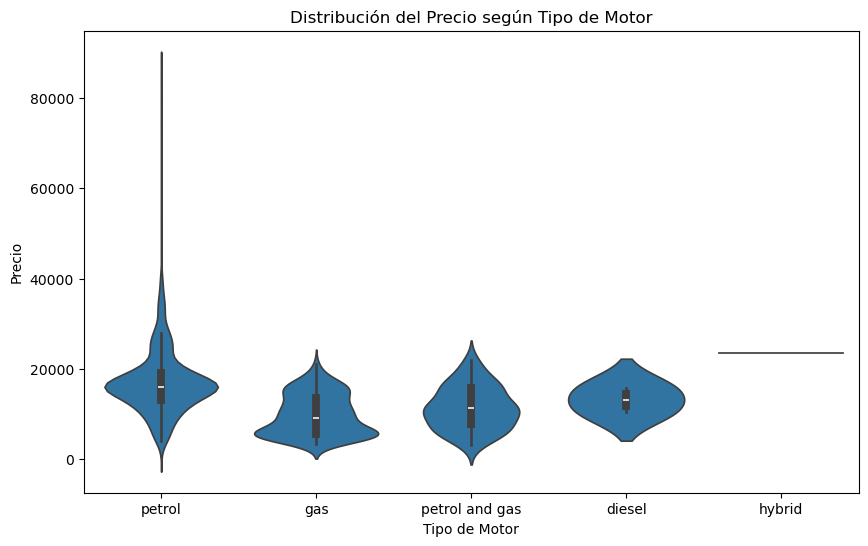

In [60]:
# Boxplot para model vs price
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='model', y='price')
plt.title('Distribución del Precio según Modelo')
plt.xlabel('Modelo')
plt.ylabel('Precio')
plt.xticks(rotation=90)
plt.show()

# Violin plot de motor_type vs price
plt.figure(figsize=(10, 6))
sns.violinplot(data=data, x='motor_type', y='price')
plt.title('Distribución del Precio según Tipo de Motor')
plt.xlabel('Tipo de Motor')
plt.ylabel('Precio')
plt.show()


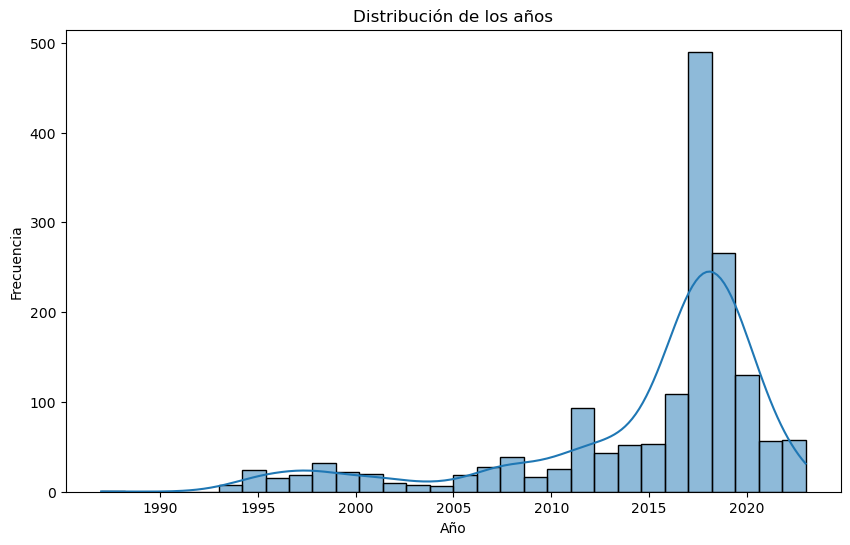

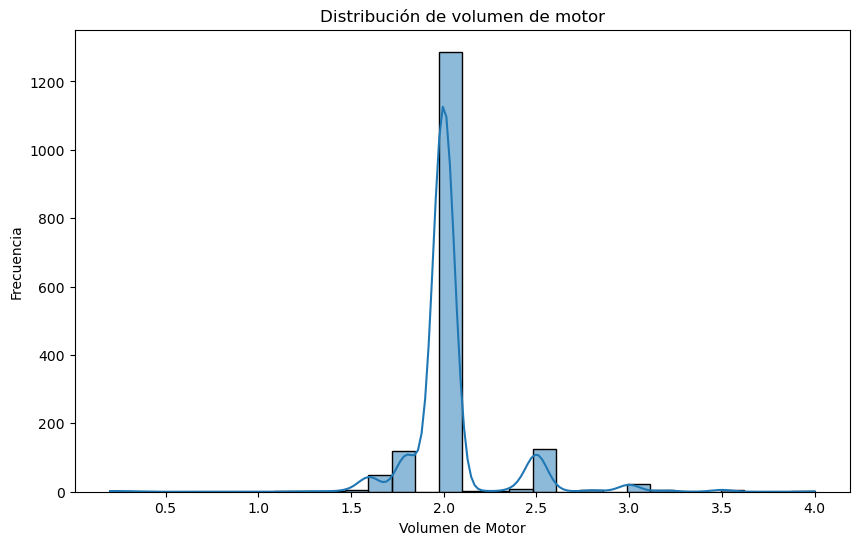

In [61]:
# Histograma de año
plt.figure(figsize=(10, 6))
sns.histplot(data['year'], kde=True, bins=30)
plt.title('Distribución de los años')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.show()

# Histograma de volumen de motor
plt.figure(figsize=(10, 6))
sns.histplot(data['motor_volume'], kde=True, bins=30)
plt.title('Distribución de volumen de motor')
plt.xlabel('Volumen de Motor')
plt.ylabel('Frecuencia')
plt.show()


In [47]:
# Eliminar texto adicional como 'km' o 'miles' y convertir a número
data['running'] = data['running'].str.replace('km', '').str.replace('miles', '').str.strip()
data['running'] = pd.to_numeric(data['running'], errors='coerce')

# Mostrar valores no numéricos, si existen
print(data['running'].isnull().sum())  # Cuántos valores no se pudieron convertir


0


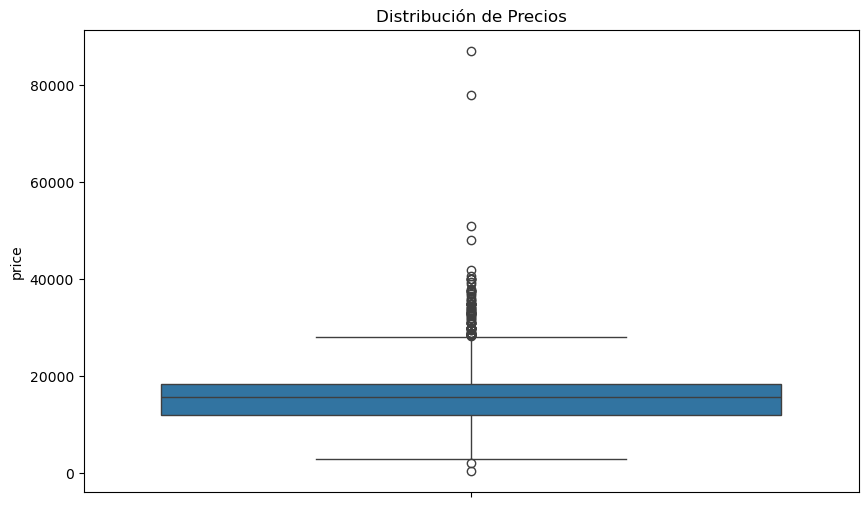

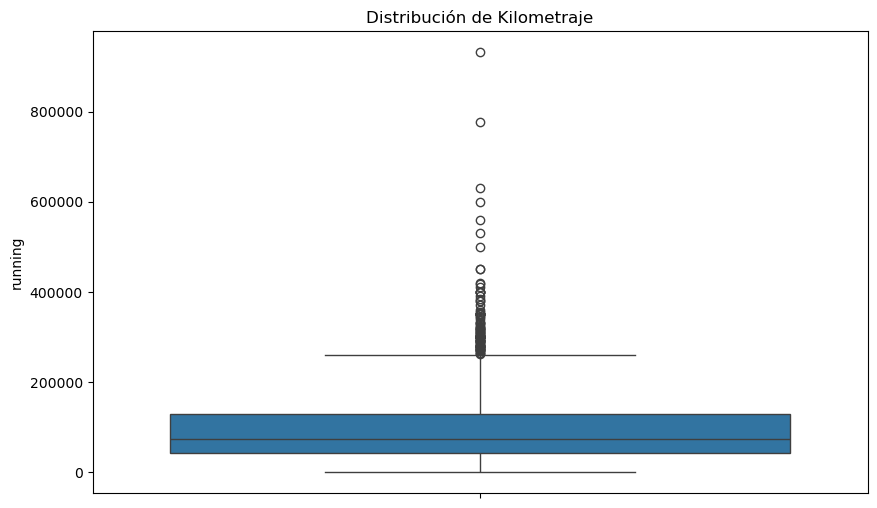

In [48]:
# Gráfico de caja para 'price'
plt.figure(figsize=(10, 6))
sns.boxplot(data['price'])
plt.title('Distribución de Precios')
plt.show()

# Gráfico de caja para 'running'
plt.figure(figsize=(10, 6))
sns.boxplot(data['running'])
plt.title('Distribución de Kilometraje')
plt.show()


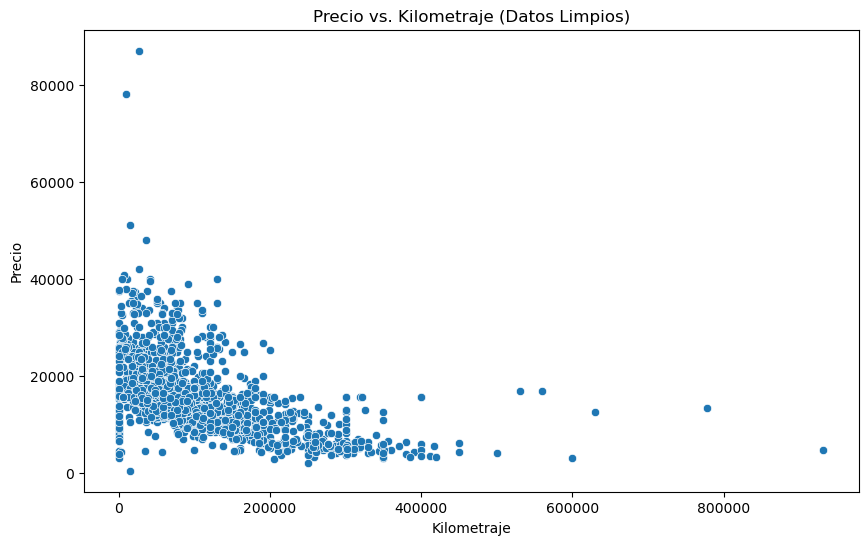

In [62]:
# Gráfico de dispersión con datos limpios
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['running'], y=data['price'])
plt.title('Precio vs. Kilometraje (Datos Limpios)')
plt.xlabel('Kilometraje')
plt.ylabel('Precio')
plt.show()


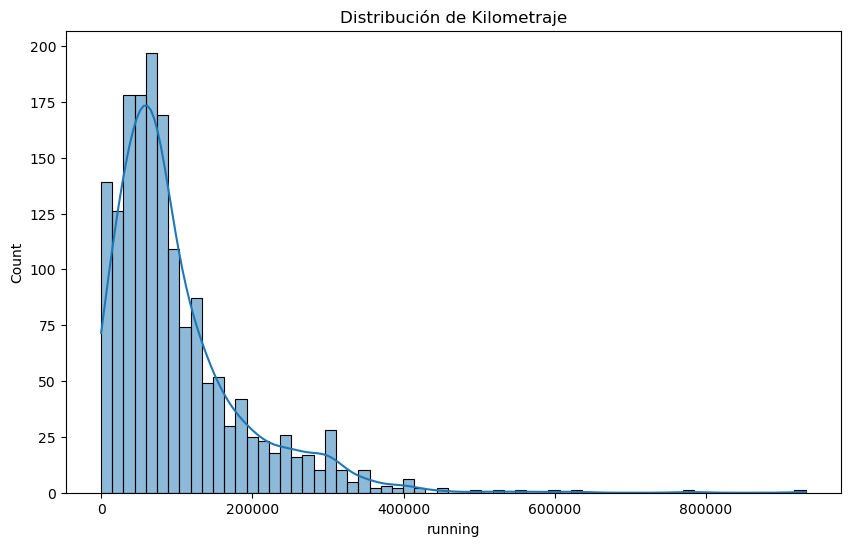

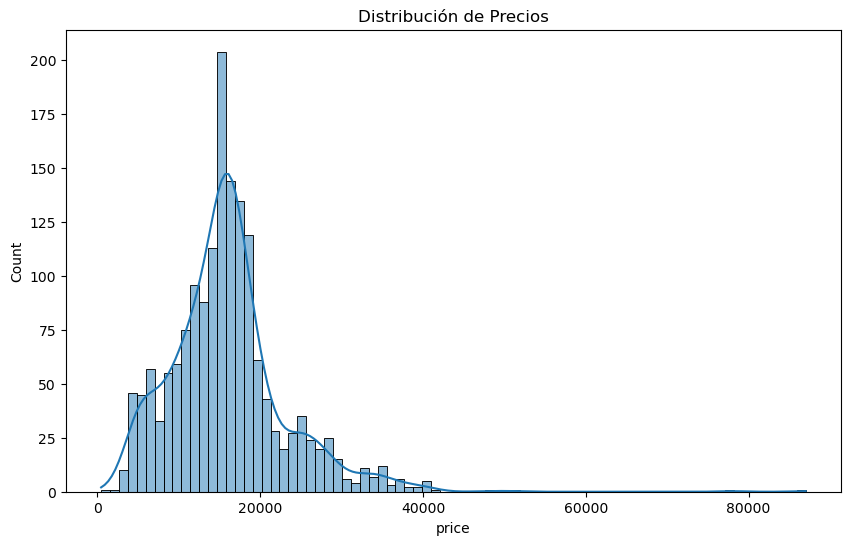

In [63]:
# Distribución de 'running' y 'price'
plt.figure(figsize=(10, 6))
sns.histplot(data['running'], kde=True)
plt.title('Distribución de Kilometraje')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data['price'], kde=True)
plt.title('Distribución de Precios')
plt.show()
